In [1]:
# Time lagged cross correlation
def crosscorr(datax, datay, lag=0):
    """ Lag-N cross correlation. 
    Shifted data filled with NaNs 

    Parameters
    ----------
    lag : int, default 0
    datax, datay : pandas.Series objects of equal length
    Returns
    ----------
    crosscorr : float
    """
    return datax.corr(datay.shift(lag))

def cross_correlation_using_fft(x, y):
    f1 = fft(x)
    f2 = fft(np.flipud(y))
    cc = np.real(ifft(f1 * f2))
    return fftshift(cc)

def compute_shift(x, y):
    assert len(x) == len(y)
    c = cross_correlation_using_fft(x, y)
    assert len(c) == len(x)
    zero_index = int(len(x) / 2) - 1
    shift = zero_index - np.argmax(c)
    return shift

In [57]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cv2
from scipy import signal
from scipy.signal import find_peaks

%matplotlib inline

In [3]:

# # Delta Function
# length = 100
# amp1, amp2 = 1, 1
# x = np.arange(0, length)
# to = 10
# timeshift = 30
# t1 = to+timeshift
# series1 = signal.unit_impulse(length, idx=to)
# series2 = signal.unit_impulse(length, idx=t1)

# # low pass filter to smoothen the edges (just to make the signal look pretty)
# b, a = signal.butter(4, 0.2)
# series1 = signal.lfilter(b, a, series1)
# series2 = signal.lfilter(b, a, series2)

# fig, ax = plt.subplots(2, 1, figsize=(8, 6), sharex=False)

# ax[0].plot(x, series1, c='b', lw=0.5)
# ax[0].axvline(x=to, c='b', lw=0.5,
#               ls='--', label=f'x={to}')
# ax[0].plot(x, series2+0.1, c='r', lw=0.5)
# ax[0].axvline(x=to+timeshift, c='r', lw=0.5,
#               ls='--', label=f'x={to+timeshift}')
# ax[0].set_yticks([0, 0.1])
# ax[0].legend()
# ax[0].set_yticklabels(['Series 1', 'Series 2'], fontsize=8)

# d1, d2 = pd.Series(series2), pd.Series(series1)
# lags = np.arange(-(50), (50), 1)

# rs = np.nan_to_num([crosscorr(d1, d2, lag) for lag in lags])
# maxrs, minrs = np.max(rs), np.min(rs)
# if np.abs(maxrs) >= np.abs(minrs):
#     corrval = maxrs
# else:
#     corrval = minrs

# ax[1].plot(lags, rs, 'k', label='Xcorr (s1 vs s2), maxcorr: {:.2f}'.format(
#     corrval), lw=0.5)
# # ax[1].axvline(x=timeshift, c='r', lw=0.5, ls='--')
# ax[1].axvline(x=lags[np.argmax(rs)], c='r', lw=0.5,
#               ls='--', label='max time correlation')
# ax[1].legend(fontsize=6)
# plt.subplots_adjust(hspace=0.25, wspace=0.1)
# plt.show('xcorr_fn_delta.png')
# plt.close('all')

## Load Image

In [4]:
from os import listdir

path = "data/Images/Test/"

for fileName in listdir(path):
    print(fileName)
    
file = listdir(path)[9]

In [96]:
# for fileName in listdir(path):   
#     # Load image
#     # img = cv2.imread("data/Images/IMG_3922.JPEG")
#     img = cv2.imread(path + fileName)


#     # Resize
#     print('Original Dimensions : ',img.shape)

#     scale_percent = 20 # percent of original size
#     width = int(img.shape[1] * scale_percent / 100)
#     height = int(img.shape[0] * scale_percent / 100)
#     dim = (width, height)

#     # resize image
#     resized_image = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)

#     # Change COLOR mode
#     rgb_image = cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB)

#     # gray_image = cv2.cvtColor(resized_image, cv2.COLOR_BGR2GRAY)

#     plt.imshow(rgb_image)
#     plt.show()

Original Dimensions :  (3024, 4032, 3)


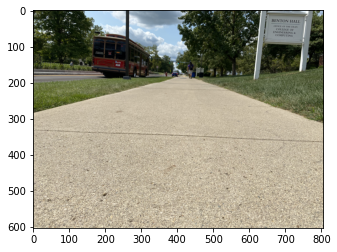

In [97]:
# Load image
# img = cv2.imread("data/Images/IMG_3922.JPEG")
img = cv2.imread(path + file)


# Resize
print('Original Dimensions : ',img.shape)
 
scale_percent = 20 # percent of original size
width = int(img.shape[1] * scale_percent / 100)
height = int(img.shape[0] * scale_percent / 100)
dim = (width, height)
  
# resize image
resized_image = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)

# Change COLOR mode
rgb_image = cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB)

# gray_image = cv2.cvtColor(resized_image, cv2.COLOR_BGR2GRAY)

plt.imshow(rgb_image)

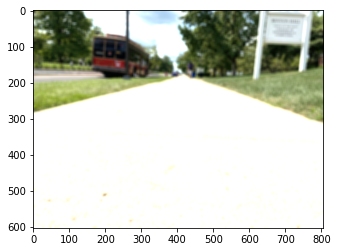

In [98]:
kernel = np.ones((9,9),np.float32)/49
dst = cv2.filter2D(rgb_image,-1,kernel)

plt.imshow(dst)

In [99]:
### 3 COLOR CHANNELS
red_channel = rgb_image[:,:,0]
green_channel = rgb_image[:,:,1]
blue_channel = rgb_image[:,:,2]

red_channel_st = dst[:,:,0]
green_channel_st = dst[:,:,1]
blue_channel_st = dst[:,:,2]

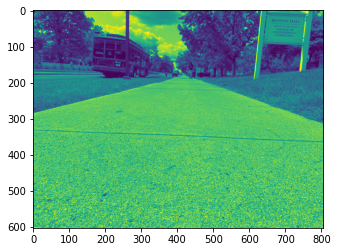

In [100]:
plt.imshow(green_channel)

### DECLARE (Oy) POSITION FOR TESTING 

In [101]:
line = 400

target = green_channel[line,:].reshape(1,-1)
target_st = green_channel_st[line,:].reshape(1,-1)

### BEFORE SMOOTHENED

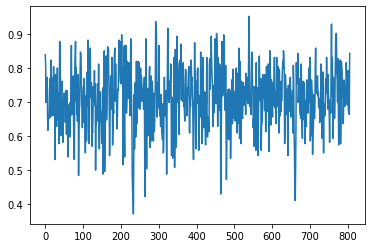

In [102]:
plt.plot(target[0] / 256)

### AFTER SMOOTHENED

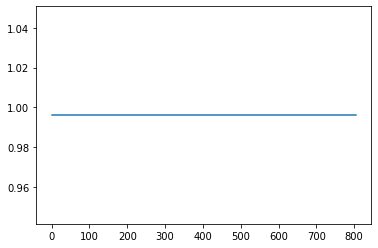

In [103]:
plt.plot(target_st[0] / 256)

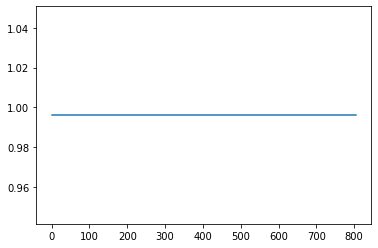

In [104]:
plt.plot(red_channel_st[line,:].reshape(1,-1)[0] / 256)


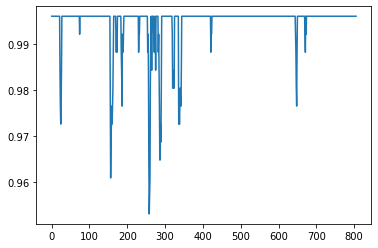

In [105]:
plt.plot(blue_channel_st[line,:].reshape(1,-1)[0] / 256)


### AREA OF INTEREST ###
* I reason that the "robot" doesn't need to look to far away, when we drive on highway at night, we can just follow the line a few feets ahead without tracking the line to the end of it.
* We can just find the line from the interested box of image, it can eliminate a lot of noise like background, trees, the sun, etc ...

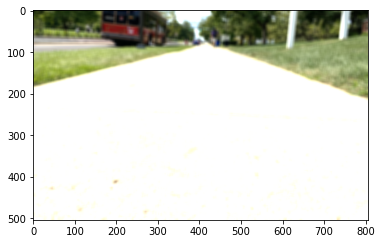

In [106]:
Y_interest = 100
plt.imshow(dst[Y_interest:,:,:])

__We only need 2 points to draw the edge line function.__
* However, in a non-perfect world, we can have noise, and we may not always find exactly 2 edge-points on a horizontal line of image. This is where RANSAC can become handy.
* We can just randomly pick 

In [107]:
for row in [100, 200, 250, 300, 400, 450]:
    print(row)

100
200
250
300
400
450


In [114]:
dots = []

for row in [100, 280, 300, 400, 450]:
    # target_st = target_st / 256
    temp = dst[:,:,1] / 256
    ## Green channel\
    gradients = [0]
#     row = line
    for i in range(target[0].shape[0] - 2):
        index = i + 1
        dx = (temp[row, index + 1] - temp[row, index - 1]) * (1/2)
        dy = (temp[row+1, index] - temp[row-1, index]) * (1/2)
        gradient = np.sqrt(dy ** 2 + dx ** 2)
        gradients.append(gradient)
    # Add 0 to equal the 0x-Dimension size
    gradients.append(0)

    gradients = np.array(gradients)
    # plt.plot(gradients)
    # plt.show()

    mid_level = (gradients.max() - gradients.mean() ) * 0.5
    peaks, _ = find_peaks(gradients, height=gradients.min() + mid_level, distance=100)

    # print(np.diff(peaks))

    # plt.plot(gradients)
    # plt.plot(peaks, gradients[peaks], "x")
    # plt.show()

    # peaks

    for peak in peaks:
        print(f"<{peak}, {row}>  ", end="")
        dots.append([peak, row])
    print("")

<300, 100>  <425, 100>  <617, 100>  <741, 100>  
<10, 280>  <713, 280>  
<760, 300>  




In [115]:
dots

[[300, 100],
 [425, 100],
 [617, 100],
 [741, 100],
 [10, 280],
 [713, 280],
 [760, 300]]

In [116]:
np.zeros_like(dst[:,:,1]).shape

(604, 806)

In [117]:
template

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

[300, 100]
[425, 100]
[617, 100]
[741, 100]
[10, 280]
[713, 280]
[760, 300]


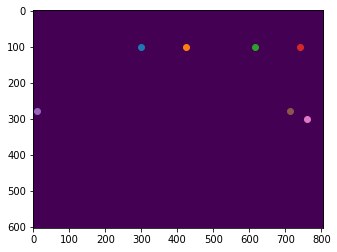

In [118]:
# temp_img = dst[:,:,1].copy()
template = np.zeros_like(dst[:,:,1])

for dot in dots:
    print(dot)
    plt.scatter(dot[0], dot[1])
    template[dot[1], dot[0]] = 255

plt.imshow(template)

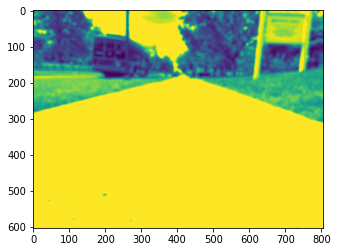

In [119]:
plt.imshow(dst[:,:,1])

### CALCULATE GRADIENT OF PIXELS AT CHOSEN LINE 

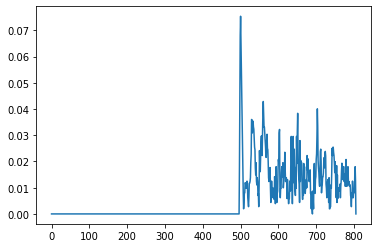

In [47]:
# target_st = target_st / 256
temp = dst[:,:,1] / 256
## Green channel\
gradients = [0]
row = line
for i in range(target[0].shape[0] - 2):
    index = i + 1
    dx = (temp[row, index + 1] - temp[row, index - 1]) * (1/2)
    dy = (temp[row+1, index] - temp[row-1, index]) * (1/2)
    gradient = np.sqrt(dy ** 2 + dx ** 2)
    gradients.append(gradient)
# Add 0 to equal the 0x-Dimension size
gradients.append(0)
    
gradients = np.array(gradients)
plt.plot(gradients)

[]


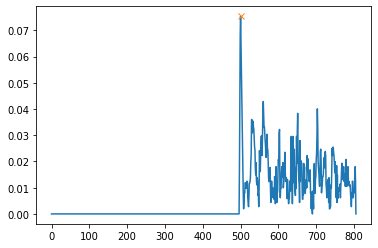

In [51]:
from scipy.signal import find_peaks

mid_level = (gradients.max() - gradients.mean() ) * 1
peaks, _ = find_peaks(gradients, height=gradients.min() + mid_level, distance=100)

print(np.diff(peaks))

plt.plot(gradients)
plt.plot(peaks, gradients[peaks], "x")
plt.show()

In [21]:
peaks

array([247, 548, 783])

__Conclusion from the peaks:__

In [22]:
print(f"<{peaks[0]}, {line}> and <{peaks[1]}, {line}> belong to the edge")

<247, 200> and <548, 200> belong to the edge


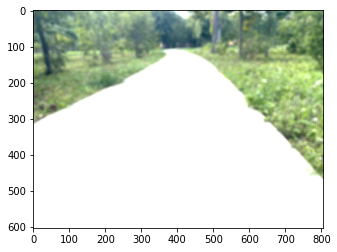

In [23]:
plt.imshow(dst)

### Find 2nd set of points

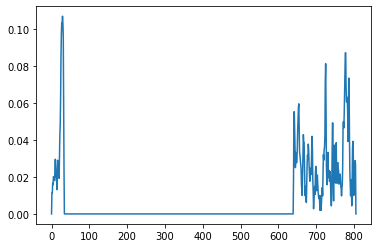

In [24]:
# line2 = 300

# target_2 = green_channel_st[line,:].reshape(1,-1)

# ## Calculate gradient
# # target_st = target_st / 256
# temp = dst[:,:,1] / 256
# ## Green channel\
# gradients2 = [0]
# row = line2
# for i in range(target[0].shape[0] - 2):
#     index = i + 1
#     dx = (temp[row, index + 1] - temp[row, index - 1]) * (1/2)
#     dy = (temp[row+1, index] - temp[row-1, index]) * (1/2)
#     gradient = np.sqrt(dy ** 2 + dx ** 2)
#     gradients2.append(gradient)
# # Add 0 to equal the 0x-Dimension size
# gradients2.append(0)
    
# gradients2 = np.array(gradients2)
# plt.plot(gradients2)

[625 123]


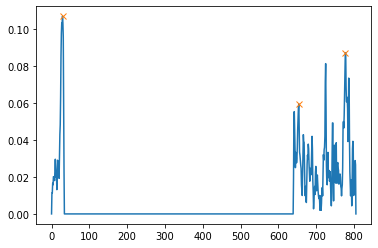

In [25]:
# mid_level = (gradients2.max() - gradients2.min() ) * 0.4
# peaks2, _ = find_peaks(gradients2, height=gradients2.min() + mid_level, distance=100)

# print(np.diff(peaks2))

# plt.plot(gradients2)
# plt.plot(peaks2, gradients2[peaks2], "x")
# plt.show()

In [26]:
print(f"<{peaks[0]}, {line}> and <{peaks[1]}, {line}> belong to the edge")
print(f"<{peaks2[0]}, {line2}> and <{peaks2[1]}, {line2}> belong to the edge")

<247, 200> and <548, 200> belong to the edge
<29, 300> and <654, 300> belong to the edge


### Calculate the line formulas and their interception

In [27]:
# # x1 = a * y1 + b
# # x2 = a * y2 + b
# # LEFT
# a_left = (peaks[0] - peaks2[0]) / (line - line2)
# b_left = peaks[0] - (line * a_left)

# print(f"LEFT: X = {a_left} * Y + {b_left}")

# # Right
# a_right = (peaks[1] - peaks2[1]) / (line - line2)
# b_right = peaks[1] - (line * a_right)

# print(f"RIGHT: X = {a_right} * Y + {b_right}")

# Y_intercept = (b_left - b_right) / (a_right - a_left)
# Y_intercept = int(np.rint(Y_intercept))
# X_intercept = a_left * Y_intercept + b_left
# X_intercept = int(np.rint(X_intercept))

# print(f"Intercept at [{X_intercept}, {Y_intercept}]")

LEFT: X = -2.18 * Y + 683.0
RIGHT: X = 1.06 * Y + 336.0
Intercept at [450, 107]


### Segmentation 

In [28]:
# canvas = np.ones_like(dst) * [0, 0, 250]

# canvas[Y_intercept, X_intercept] = [230, 0, 0]
# for i in range(Y_intercept+1, canvas.shape[0]):
#     leftDot  = int(np.rint(a_left * i + b_left))
#     rightDot = int(np.rint(a_right * i + b_right))

#     if  leftDot <  canvas.shape[1] and leftDot >= 0 and rightDot <  canvas.shape[1] and rightDot >= 0:
#         for dot in range(leftDot, rightDot):
#             canvas[i, dot] = [230, 0, 0]
#     elif  leftDot < canvas.shape[1] and leftDot >= 0:
#         for dot in range(leftDot, canvas.shape[1]):
#             canvas[i, dot] = [230, 0, 0]
#     elif  rightDot < canvas.shape[1] and rightDot >= 0:
#         for dot in range(rightDot):
#             canvas[i, dot] = [230, 0, 0]
#     elif rightDot > canvas.shape[1] and leftDot < 0:
#         canvas[i, :] = [230,0,0]
#     else:
#         continue

### Add edge to the picture

In [29]:
# copy_image = rgb_image.copy()

# # copy_image[Y_intercept, X_intercept] = [200, 0, 0]
# for i in range(Y_intercept+1, canvas.shape[0]):
#     leftDot  = int(np.rint(a_left * i + b_left))
#     rightDot = int(np.rint(a_right * i + b_right))
#     if  leftDot <  copy_image.shape[0] and leftDot >= 0:
#         copy_image[i, leftDot] = [200, 0, 0]
#     if  rightDot <  copy_image.shape[0] and rightDot >= 0:
#         copy_image[i, rightDot] = [200, 0, 0]

In [30]:
# copy_image.shape

(604, 806, 3)

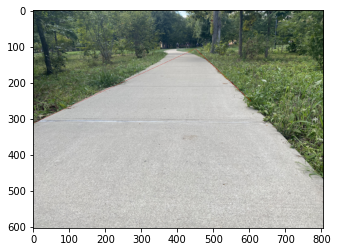

In [31]:
# # plt.show(copy_image)
# plt.imshow(copy_image)

Text(0.5, 1.0, 'Orignial Image with line added')

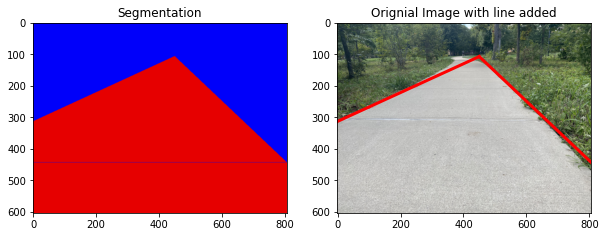

In [32]:
# # create figure
# fig = plt.figure(figsize=(10, 7))

# # setting values to rows and column variables
# rows = 1
# columns = 2
  
# fig.add_subplot(rows, columns, 1)
  
# # showing image
# plt.imshow(canvas)
# # plt.axis('off')
# plt.title("Segmentation")
  
# # Adds a subplot at the 2nd position
# fig.add_subplot(rows, columns, 2)
  
# copy2 = rgb_image.copy()

# x_l = [0, X_intercept]
# y_l = [int(-b_left / a_left), Y_intercept]
# plt.plot(x_l, y_l, color="red", linewidth=3)
# x_r = [copy2.shape[1]-1, X_intercept]
# y_r = [(int(copy2.shape[1]-1-b_right)/ a_right), Y_intercept]
# plt.plot(x_r, y_r, color="red", linewidth=3)
# plt.imshow(copy2)
# # showing image
# # plt.imshow(copy_image)
# # plt.axis('off')
# plt.title("Orignial Image with line added")

In [33]:
# sub_grad = []
# for grad in gradients:
#     if grad < (gradients.min() + (gradients.max() - gradients.min()) * 0.75):
#         sub_grad.append(0)
#     else: 
#         sub_grad.append(1)
    
# sub_grad = np.array(sub_grad)
# plt.plot(sub_grad)

### CROSS_CORRELATION

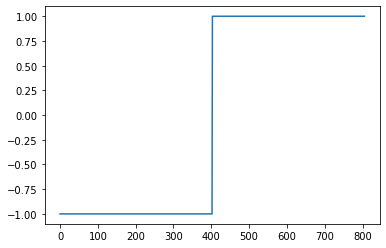

In [54]:
# x_len = dst.shape[1]

# midpoint = int(x_len / 2)

# sample_signal = np.ones((1, x_len))

# for i in range(midpoint):
#      sample_signal[0, i] = -1

# plt.plot(sample_signal.reshape(-1,1))        

In [56]:
# series1 = pd.Series(target_st[0].reshape(-1) / 256)

# signal_series = pd.Series(sample_signal.reshape(-1))

# lag_range = 800
# lags = np.arange(-(lag_range), (lag_range), 1)  # contrained

# plt.plot(rs)

In [36]:
# leftPoint = midpoint + rs.argmin() - lag_range
# rightPoint = midpoint + rs.argmax() - lag_range

### END OF CODE SAMPLE OCT 5, 2021
__RESULT:__
* Smoothing image reduces a lot of noise
* I have performed cross-correlation on line y = 250
* Detect 2 optimas, same as your result, however, I don't know how to map to find "edge" given the cross_correlation "lag" or "shift" 